<h1>Import Libraries</h1>


In [ ]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

<h1>Define Paths and Data Generators </h1>

In [ ]:
# Define paths
data_dir = 'C:/Users/DELL/Downloads/all/'

# Image data generator for preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

# Training data generator
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='input',
    subset='training'
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='input',
    subset='validation'
)


<h1>Define and Compile the Model


In [62]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128 * 128 * 3, activation='sigmoid'),  # Output layer to match input dimensions
    tf.keras.layers.Reshape((128, 128, 3))  # Reshape to image dimensions
])

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 49152)               │       3,194,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 128, 128, 3)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,752,064 (37.20 MB)

 Trainable params: 9,752,064 (37.20 MB)

 Non-trainable params: 0 (0.00 B)

<h2>Train the Model</h1>

In [63]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/20


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


328/328 ━━━━━━━━━━━━━━━━━━━━ 106s 314ms/step - loss: 0.0662 - val_loss: 0.0290
Epoch 2/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.0358 - val_loss: 0.0337
Epoch 3/20


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


328/328 ━━━━━━━━━━━━━━━━━━━━ 103s 312ms/step - loss: 0.0308 - val_loss: 0.0263
Epoch 4/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 146us/step - loss: 0.0265 - val_loss: 0.0236
Epoch 5/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 104s 317ms/step - loss: 0.0284 - val_loss: 0.0245
Epoch 6/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 148us/step - loss: 0.0239 - val_loss: 0.0259
Epoch 7/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 130s 397ms/step - loss: 0.0272 - val_loss: 0.0233
Epoch 8/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step - loss: 0.0220 - val_loss: 0.0269
Epoch 9/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 192s 576ms/step - loss: 0.0266 - val_loss: 0.0229
Epoch 10/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 134us/step - loss: 0.0236 - val_loss: 0.0200
Epoch 11/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 94s 285ms/step - loss: 0.0259 - val_loss: 0.0235
Epoch 12/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 141us/step - loss: 0.0260 - val_loss: 0.0274
Epoch 13/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 94s 285ms/step - loss: 0.0256 - val_loss: 0.0224
Epoch 14/20
328/328 ━━━━━━━━━

<h1>Plot Training and Validation Loss

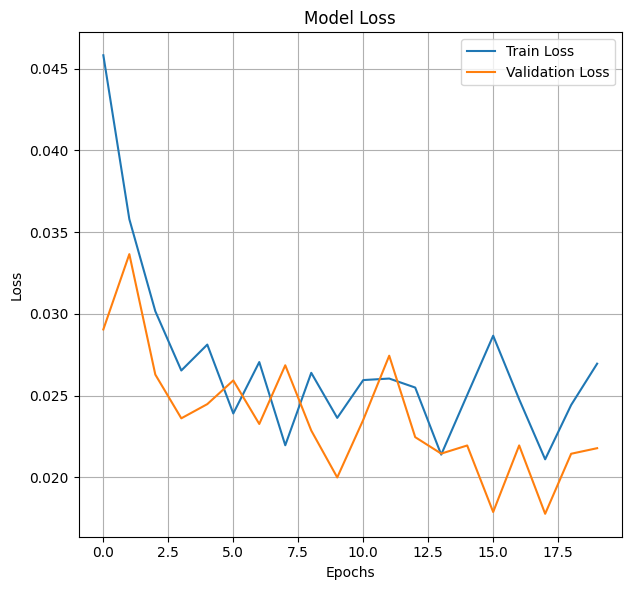

In [80]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


<h1>Extract features from an image using the trained model

In [64]:
def extract_features(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    features = model.predict(img_array)
    return features.flatten()

<h1>Calculate cosine similarity between two images</h1>

In [65]:
def calculate_similarity(image1_path, image2_path, model):
    features1 = extract_features(image1_path, model)
    features2 = extract_features(image2_path, model)
    similarity = cosine_similarity([features1], [features2])
    return similarity[0][0]

<h2>Similarity test two img

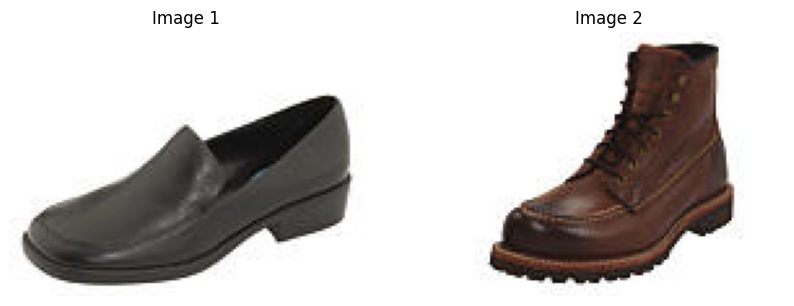

In [87]:
from PIL import Image
import matplotlib.pyplot as plt

# Paths to the images
image1_path = r'C:\Users\DELL\Downloads\all\all\13.jpg'
image2_path = r'C:\Users\DELL\Downloads\all\all\12.jpg'

# Open images
image1 = Image.open(image1_path)
image2 = Image.open(image2_path)

# Plot images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(image1)
axs[0].set_title('Image 1')
axs[0].axis('off')

axs[1].imshow(image2)
axs[1].set_title('Image 2')
axs[1].axis('off')

plt.show()


<H2>Similarity percentage </H2>

In [89]:
similarity_score = calculate_similarity(image1_path, image2_path, model)
print(f'Similarity score between the two images: {similarity_score}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Similarity score between the two images: 0.9313979744911194
